#  Chapter 10

Problems 2, 4, 5, 7, 9, 10, 12, 13

## 10.2

Problem 2: The half life for 209 Pb is 3.3 hours, not 3.3 minutes as shown in the figure.


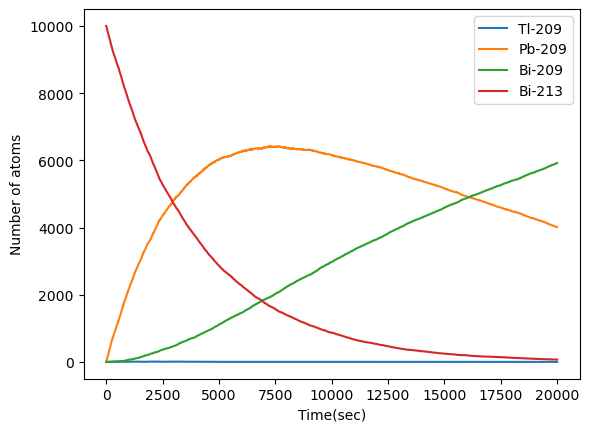

In [1]:
# starting with Newman's decay.py


# parts a, b, c all together below


from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show, legend

# Constants
NBi213 = 10000        # Number of Bi 213 atoms
NBi209 = 0            # Number of Bi 209 atoms
NTl = 0               # Number of Thallium atoms
NPb = 0               # Number of Lead atoms
# tau = 46*60         # this is half life, its just directly written in prob eq.
h = 1.0               # Size of time-step in seconds
pPb = 1 - 2**(-h/(3.3*60*60))      # Probability of decay in one step         Pb 209
pTl = 1 - 2**(-h/(2.2*60))             # Probability of decay in one step         Tl 209
pBi213 = 1 - 2**(-h/(46*60))       # Probability of decay in one step         Bi 213
tmax = 20000          # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
Bi209points = []
Bi213points = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi209points.append(NBi209)
    Bi213points.append(NBi213)

    # Calculate the number of atoms that decay
    
    # Pb 209
    for i in range(NPb):
        if random()<pPb:
            NPb -= 1
            NBi209 += 1
    
    
    # Tl 209
    for i in range(NTl):
        if random()<pTl:
            NTl -= 1
            NPb += 1
    
    
    # Bi 213
    for i in range(NBi213):
        if random()<pBi213:
            NBi213 -= 1
            if random()<0.9791:
                NPb += 1
            else:
                NTl += 1
    

# Make the graph
plot(tpoints, Tlpoints, label='Tl-209')
plot(tpoints, Pbpoints, label='Pb-209')
plot(tpoints, Bi209points, label='Bi-209')
plot(tpoints, Bi213points, label='Bi-213')

xlabel("Time(sec)")
ylabel("Number of atoms")
legend()
show()
# blue line no longer goes under 0 so should be correct

## 10.4

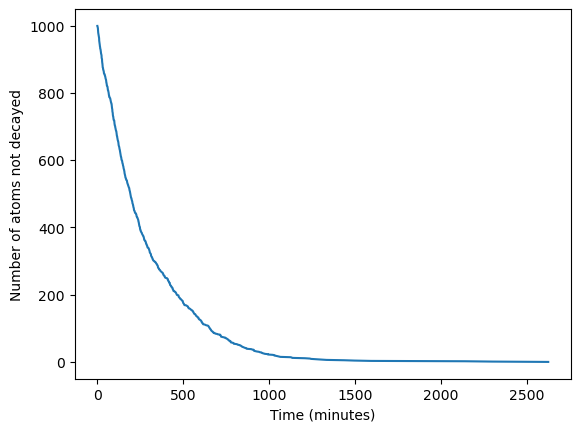

In [2]:
# starting with Newman's decay.py

from numpy.random import random
from numpy import arange, log 
from pylab import plot, xlabel, ylabel, show
from numpy import sort 

# Constants
tau = 3.053*60    # Thallium 208 has a half-life of 3.053 min
mu = log(2)/tau
N = 1000          # Generating 1000 random numbers
z = random(N)

x = -1/mu * log(1-z) # equation 10.10
x_new = sort(x)      # ordering as given by book's hint

decayed = arange(1,N+1)
not_decayed = -decayed + N

# Plot
plot(x_new, not_decayed)
xlabel('Time (minutes)')
ylabel('Number of atoms not decayed')
show()

## 10.5

In [3]:
from math import sin
from random import random

def f(x):
    return (sin(1/(x*(2-x))))**2

# hit or miss Monte Carlo
N = 10000
count = 0

for i in range(N):
    x = 2*random()
    y = random()
    if y < f(x):
        count += 1

I_hit_or_miss = 2*count / N
error_hit_or_miss = 2 / (N**0.5)

print("Hit-or-miss Monte Carlo estimate:", I_hit_or_miss)
print("Error:", error_hit_or_miss)

# Mean value method
sum_f = 0

for i in range(N):
    x = 2*random()
    sum_f += f(x)

I_mean_value = 2*sum_f / N
variance = sum((f(2*random()) - I_mean_value)**2 for _ in range(N)) / (N-1)
error_mean_value = (4*variance / N)** 0.5

print("Mean value estimate:", I_mean_value)
print("Error:", error_mean_value)

Hit-or-miss Monte Carlo estimate: 1.4478
Error: 0.02
Mean value estimate: 1.4493585296256957
Error: 0.015444729325401536


## 10.7
Problem 7: Write your code to output the volume of "n-balls" of dimension n=1 through n=10 (not just 10).  Tip: As discussed in the lecture, you can save some time by loading all the random numbers at once
    r = rng.random(size=(npts,nd))
    
Tip #2: you can get the length of a vector using `norm` from numpy.linalg package, and think how you'd use the 'axis = ' keyword argument.  Play around with just 5-10 random number vectors and a set seed to work up your code.  See https://en.wikipedia.org/wiki/Volume_of_an_n-ball%5D for what volumes you should find.


In [4]:
import numpy as np

def monte_carlo_volume(n_dim, n_points):
    points = np.random.uniform(-1, 1, size=(n_points, n_dim))
    
    distances_squared = np.sum(points**2, axis=1)
    points_inside = distances_squared <= 1
    
    # Count the points inside the unit sphere
    points_inside_count = np.sum(points_inside)
    
    # unit radius
    R = 1
    
    # volume equations
    if n_dim == 0:
        volume = 1
        
    elif n_dim == 1:
        volume = 2 * R
        
    elif n_dim == 2:
        volume = 3.142 * R**2    # for these I am using the number values from the given wikipedia link
                                 # instead of np.pi so may end values may have less decimal place accuracy
    elif n_dim == 3:
        volume = 4.189 * R**3
        
    elif n_dim == 4:
        volume = 4.935 * R**4
        
    elif n_dim == 5:
        volume = 5.264 * R**5
        
    elif n_dim == 6:
        volume = 5.168 * R**6
        
    elif n_dim == 7:
        volume = 4.725 * R**7
        
    elif n_dim == 8:
        volume = 4.059 * R**8
        
    elif n_dim == 9:
        volume = 3.299 * R**9
    
    elif n_dim ==10:
        volume = 2.550 * R**10
    
    return volume

n_points = 1000000 # 1 million as problem suggests

for n_dim in range(0, 11):
    volume = monte_carlo_volume(n_dim, n_points)
    print(f"Volume of {n_dim}-D sphere: {volume:.6f}")

Volume of 0-D sphere: 1.000000
Volume of 1-D sphere: 2.000000
Volume of 2-D sphere: 3.142000
Volume of 3-D sphere: 4.189000
Volume of 4-D sphere: 4.935000
Volume of 5-D sphere: 5.264000
Volume of 6-D sphere: 5.168000
Volume of 7-D sphere: 4.725000
Volume of 8-D sphere: 4.059000
Volume of 9-D sphere: 3.299000
Volume of 10-D sphere: 2.550000


## 10.9

10.9: Tip s1 = s[:-1,:]*s[1:,:]   # left/right
                    = s[0,:]*s[1,:] + ... + s[N-2,:]*s[N-1,:]
similar for up/down
E = -J(sum(s1) + sum(s2))

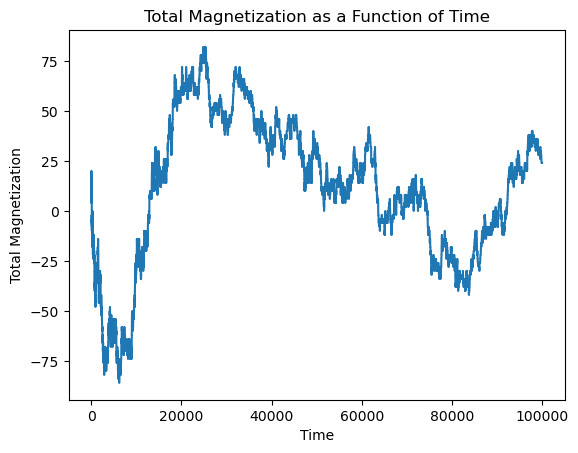

In [5]:
# part a,b,c

from __future__ import division, print_function
from pylab import *
from numpy.random import *

seed(7)

N = 20
T = 1
J = 1
beta = 1
kb = 1

steps = 100000
s = empty((N,N),int)

for i in range(N):
    for j in range(N):
        if random() < 0.5:
            s[i,j] = 1
        else:
            s[i,j] = -1
            
def energy(s):
    s1 = s[:-1,:] * s[1:,:]      # using given Tip for problem
    s2 = s[:,:-1] * s[:,1:]
    E = -J * (sum(s1) + sum(s2))
    return E

eplot = []
Mplot = []

E1 = energy(s)
M = sum(s)

for k in range(steps):
    i = randint(N)
    j = randint(N)
    s[i,j] *= -1
    E2 = energy(s)
    dE = E2 - E1
    
    if dE > 0:
        if random() < exp(-beta*dE):
            E1 = E2
            M = sum(s)
        else:
            s[i,j] *= -1
    else:
        E1 = E2
        M = sum(s)
        
    Mplot.append(M)

plt.plot(Mplot)
plt.xlabel('Time')
plt.ylabel('Total Magnetization')
plt.title('Total Magnetization as a Function of Time')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

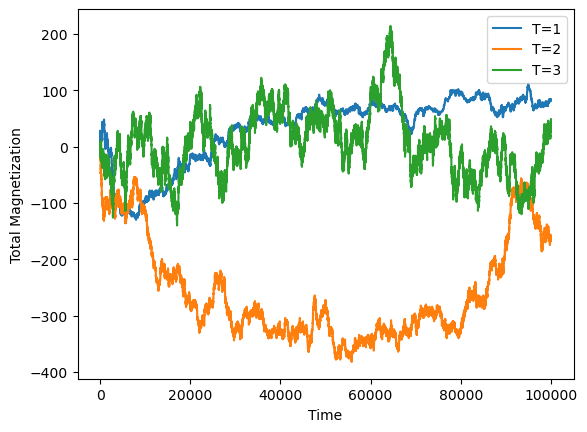

In [6]:
# part d and e

from __future__ import division, print_function
import numpy as np
from vpython import *
from numpy.random import *

seed(7)

N = 20
J = 1
T_values = [1, 2, 3]
kb = 1
beta_values = [1, 1/2, 1/3]
steps = 100000

# calculate energy
def energy(s):
    s1 = s[:-1,:] * s[1:,:]
    s2 = s[:,:-1] * s[:,1:]
    E = -J * (np.sum(s1) + np.sum(s2))
    return E

# update spins
def update_spin(s, beta):
    i = randint(N)
    j = randint(N)
    s_new = s.copy()
    s_new[i, j] *= -1
    E1 = energy(s)
    E2 = energy(s_new)
    dE = E2 - E1
    if dE <= 0 or random() < np.exp(-beta * dE):
        return s_new, E2
    else:
        return s, E1

def visualize_spins(s):
    scene = canvas(title='Simulation:', width=600, height=600, center=vec(N/2, N/2, 0))
    spins = []
    for i in range(N):
        for j in range(N):
            if s[i, j] == 1:
                color = vector(1, 1, 1)  # white for spin up
            else:
                color = vector(1, 0, 0)  # red for spin down 
            spins.append(sphere(pos=vec(i, j, 0), radius=0.4, color=color))
    return spins

# main loop
for T, beta in zip(T_values, beta_values):
    s = np.random.choice([-1, 1], size=(N, N))  # the initial random configuration
    E = energy(s)
    spins = visualize_spins(s)
    Mplot = []
    for k in range(steps):
        s, E = update_spin(s, beta)
        M = np.sum(s)
        Mplot.append(M)
        # update every 1000
        if k % 1000 == 0:
            for i in range(N):
                for j in range(N):
                    spins[i * N + j].color = vector(1, 1, 1) if s[i, j] == 1 else vector(1, 0, 0)
            rate(100)  # this is the animation speed
    plt.plot(Mplot, label=f'T={T}')
plt.xlabel('Time')
plt.ylabel('Total Magnetization')
plt.legend()
plt.show()

In [7]:
# Describe what you find and give a brief explanation of what is happening.
# This shows a simulation of the 2d Ising model wehre we can see the progress
# of spin and track total magnitization over time.

# How and why does the behavior of the system change as temperature is increased?
# As the temperature increases, the system becomes more disordered. There is 
# also a decrease in total magnetization.

## 10.10


In [15]:
from __future__ import division, print_function
from pylab import *
from numpy.random import random, standard_normal

# part (a)
def f_a(x):
    return x**2 - cos(4 * pi * x)

# part (b)
def f_b(x):
    return cos(x) + cos(sqrt(2) * x) + cos(sqrt(3) * x)

def g(x):
    if x > 0 and x < 50:  
        return True
    else:
        return False

Tmax = 1
Tmin = 1e-3
tau = 1e4
x0_a = 2  # guess for part (a)
x0_b = 16  # guess for part (b)

def simulated_annealing(f, Tmax, Tmin, tau, x0, max_iter=10000):
    fx = f(x0)
    t = 0
    T = Tmax
    x = x0

    while T > Tmin and t < max_iter: 
        t += 1
        T = Tmax * exp(-t / tau)

        oldx = x
        oldfx = fx
        r = standard_normal()
        x += r
        if g(x):
            fx = f(x)
        else:
            fx = 1e10

        delta_fx = fx - oldfx

        if random() > exp(-delta_fx / T):
            x = oldx
            fx = oldfx

    print('x = {} with f(x) = {}'.format(x, fx))

# part (a)
print("Part (a) results:")
simulated_annealing(f_a, Tmax, Tmin, tau, x0_a)

# part (b)
print("Part (b) results:")
simulated_annealing(f_b, Tmax, Tmin, tau, x0_b)


Part (a) results:
x = 0.53503964624701 with f(x) = -0.6183473898643141
Part (b) results:
x = 16.339724003711115 with f(x) = -2.2452679610262973


## 10.12

10.12: Refer to equation 10.7.  You can plot with vpython or with matplotlib scatter3d (the latter is easier).

In [9]:
# part a
# theta ranges from 0 to π radians, -90° to 90° in degrees - latitudes 
# phi ranges from 0 to 2π radians, 0° to 360° in degrees - longitudes 

# part b
# theta = arccos⁡(1 − 2*random)

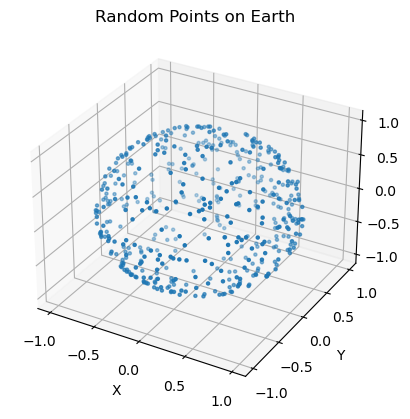

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# part c
N = 500
theta = np.arccos(1 - 2*np.random.random(N))
phi = 2*np.pi*np.random.random(N)

# part d
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Random Points on Earth")

ax.scatter3D(x, y, z, s=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 10.13

10.13:  Don't worry about the animation part unless you want to do it, just output the state every N time steps (where you'll experiment to find what a good value of N is).  And of course output the final state of the system.  Part (c) is the DLA model we described in class.  

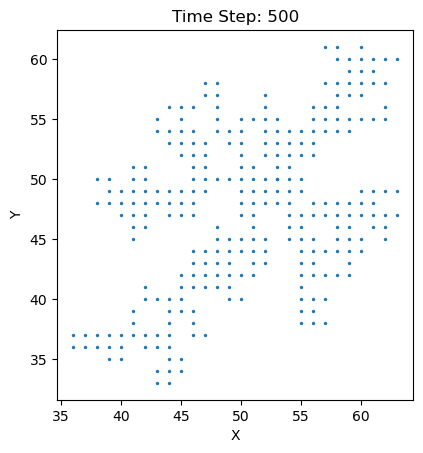

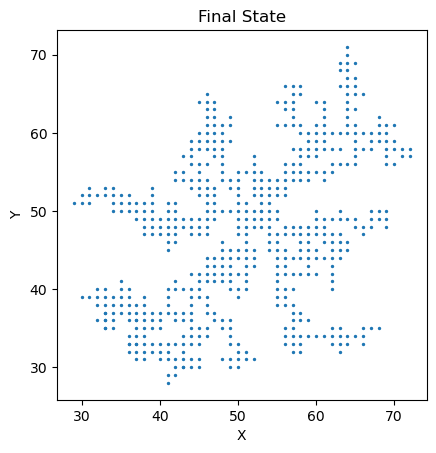

In [11]:
# part a

import numpy as np
import matplotlib.pyplot as plt

L = 101
tau = L * L
N = 500  # output every N time steps

def add(i, j, particles):
    particles.append((i, j))

def circle(r=0):
    teta = 2 * np.pi * np.random.random()
    x = (r + 1) * np.cos(teta) + L // 2
    y = (r + 1) * np.sin(teta) + L // 2

    i = int(x) + 1
    j = int(y) + 1
    return i, j

def radius(i, j):
    dx = i - L // 2
    dy = j - L // 2
    distance = np.sqrt(dx ** 2 + dy ** 2)
    return distance

particles = [(L // 2, L // 2)]
t = 0
r = 1

while r * 2 < L // 2:
    t += 1
    i, j = circle(r)
    ri = 0

    while ri <= 2 * r:
        a = np.random.randint(4)
        newi, newj = i, j

        if a == 0:
            newi += 1
        elif a == 1:
            newi -= 1
        elif a == 2:
            newj += 1
        elif a == 3:
            newj -= 1

        if (newi, newj) in particles or newi < 0 or newi >= L or newj < 0 or newj >= L:
            add(i, j, particles)
            if r < ri:
                r = int(ri)
            break
        else:
            i, j = newi, newj
        ri = radius(i, j)
        
    # print output plot every N time steps
    if t % N == 0:
        particles_arr = np.array(particles)
        plt.scatter(particles_arr[:, 0], particles_arr[:, 1], s=2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f"Time Step: {t}")
        plt.show()

# Final state plot
particles_arr = np.array(particles)
plt.scatter(particles_arr[:, 0], particles_arr[:, 1], s=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Final State")
plt.show()


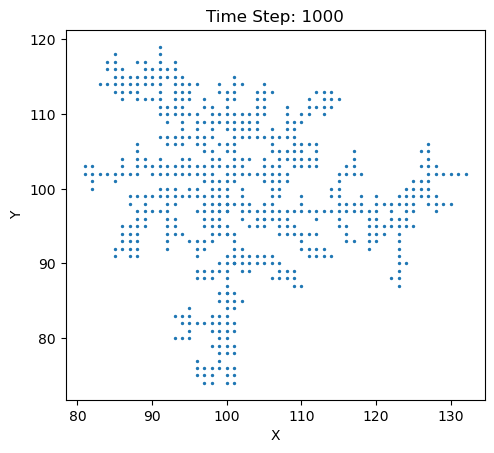

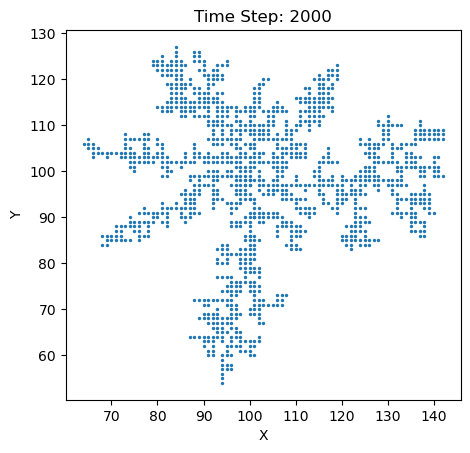

Complete


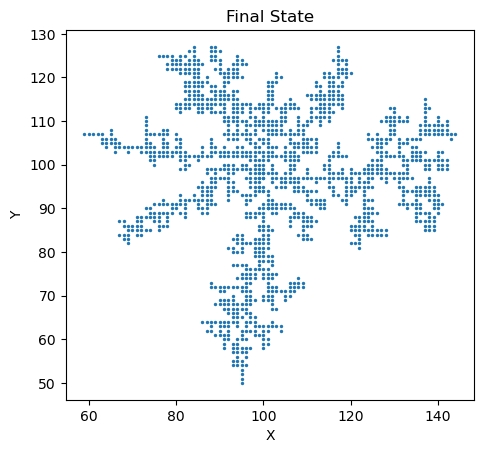

In [12]:
# part b,c

import numpy as np
import matplotlib.pyplot as plt

L = 201
tau = L * L 
N = 1000  # output every N time steps

def add(i, j, particles):
    particles.append((i, j))

def circle(r=0):
    teta = 2 * np.pi * np.random.random()
    x = (r + 1) * np.cos(teta) + L//2
    y = (r + 1) * np.sin(teta) + L//2

    i = int(x) + 1
    j = int(y) + 1
    return i, j

def radius(i, j):
    dx = i - L // 2
    dy = j - L // 2
    distance = np.sqrt(dx**2 + dy**2)
    return distance

particles = [(L // 2, L // 2)]
t = 0
r = 1

while r * 2 < L // 2:
    t += 1
    i, j = circle(r)
    ri = 0

    while ri <= 2 * r:
        a = np.random.randint(4)
        newi, newj = i, j

        if a == 0:
            newi += 1
        elif a == 1:
            newi -= 1
        elif a == 2:
            newj += 1
        elif a == 3:
            newj -= 1

        if (newi, newj) in particles or newi < 0 or newi >= L or newj < 0 or newj >= L:
            add(i, j, particles)
            if r < ri:
                r = int(ri)
            break
        else:
            i, j = newi, newj
        ri = radius(i, j)
    
    # print output plot every N time steps
    if t % N == 0:
        particles_arr = np.array(particles)
        plt.scatter(particles_arr[:, 0], particles_arr[:, 1], s=2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f"Time Step: {t}")
        plt.show()

else:
    print('Complete')

# Final state plot
particles_arr = np.array(particles)
plt.scatter(particles_arr[:, 0], particles_arr[:, 1], s=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Final State")
plt.show()